Bentuk data pelatihan setelah reshape: (60000, 28, 28, 1)
Bentuk data pengujian setelah reshape: (10000, 28, 28, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7492 - loss: 0.6821 - val_accuracy: 0.8634 - val_loss: 0.3780
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8815 - loss: 0.3232 - val_accuracy: 0.8897 - val_loss: 0.3077
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9008 - loss: 0.2703 - val_accuracy: 0.8960 - val_loss: 0.2888
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9120 - loss: 0.2370 - val_accuracy: 0.9034 - val_loss: 0.2680
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9220 - loss: 0.2138 - val_accuracy: 0.9085 - val_loss: 0.2655
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9289 - loss: 0.1944 - val_accuracy: 0.8987 - val_loss: 0.2968
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9335 - loss: 0.1744 - val_accuracy: 0.8997 - val_loss: 0.2953
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9400 - loss: 0.1587

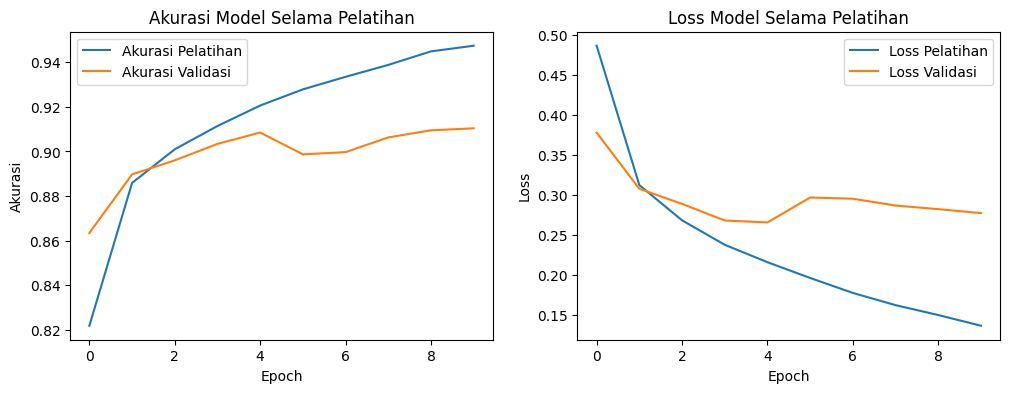

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


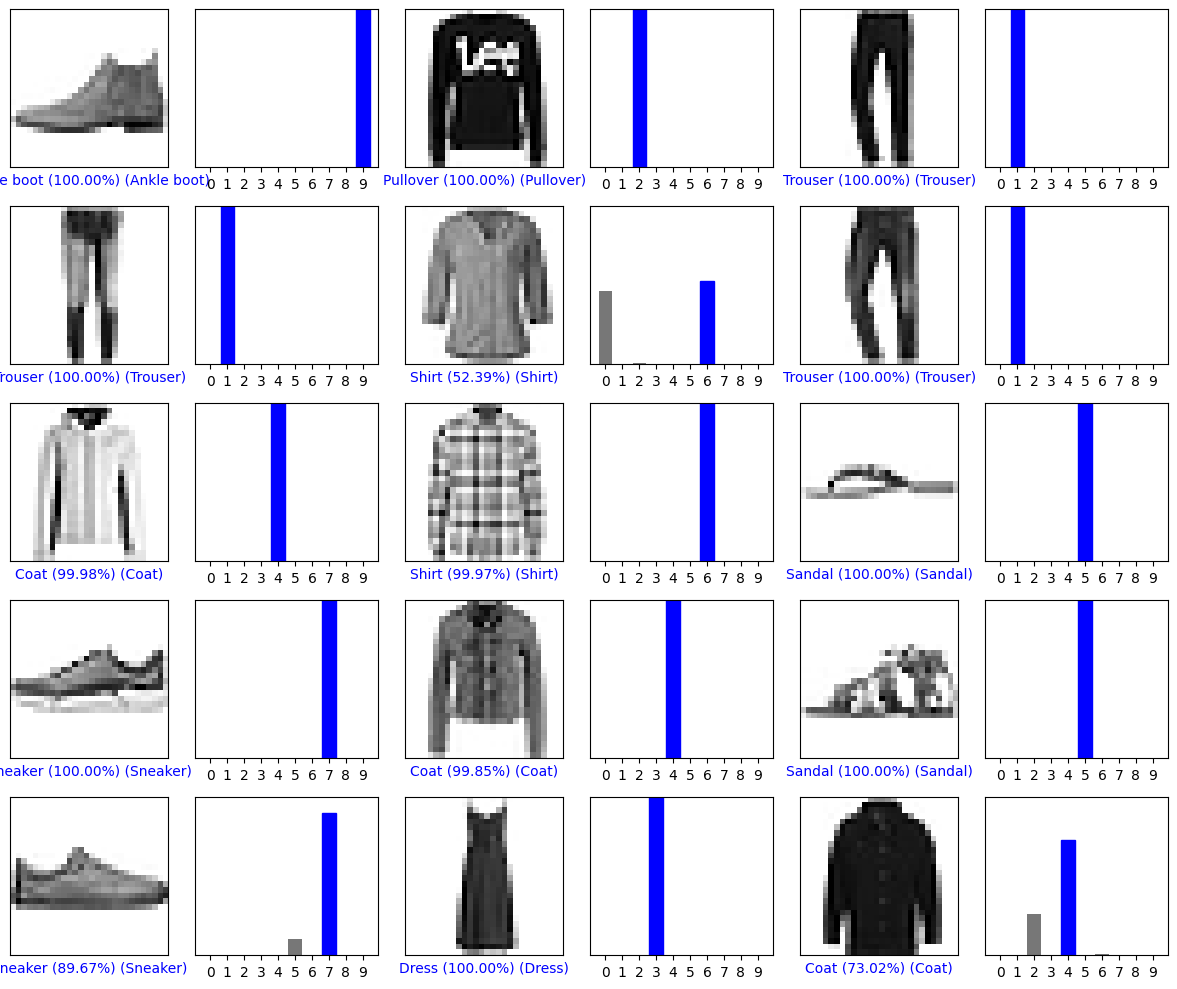

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(f"Bentuk data pelatihan setelah reshape: {train_images.shape}")
print(f"Bentuk data pengujian setelah reshape: {test_images.shape}")

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nAkurasi pada data pengujian: {test_acc:.4f}')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.title('Akurasi Model Selama Pelatihan')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Model Selama Pelatihan')
plt.legend()
plt.show()

predictions = model.predict(test_images)

def plot_image_prediction(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({100*np.max(predictions_array):.2f}%) ({class_names[true_label]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image_prediction(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


Here is the explanation of the comments from the CNN Python code you provided:

1. Loading and Preparing the Dataset
Using the Fashion MNIST dataset as an example.

This dataset contains 60,000 grayscale images of 28x28 pixels from 10 clothing categories.

Defining class names for visualization

Normalizing pixel values to the range 0-1.

This is an important step to help neural network training.

Reshaping the images to fit the CNN input.

CNN expects input in the form of (batch, height, width, channels).

For grayscale images, channels = 1.

Example: from (60000, 28, 28) to (60000, 28, 28, 1)

2. Building the CNN Model
A CNN model typically consists of a stack of convolutional and pooling layers, followed by fully connected layers for classification.

First Convolutional Layer:

filters=32: Number of filters to be used (will produce 32 feature maps).

kernel_size=(3, 3): Size of the filter (3x3 pixels).

activation='relu': Rectified Linear Unit activation function.

input_shape=(28, 28, 1): Shape of the input image (height, width, channels).

First Max Pooling Layer:

pool_size=(2, 2): Reduces the spatial dimensions by a factor of 2x2.

This helps reduce the number of parameters and computation, as well as prevent overfitting.

Second Convolutional Layer:

More filters to learn more complex features.

Third Convolutional Layer:

Often, the last convolutional layer is not followed by pooling if we want to retain spatial information before flattening.

Flatten Layer:

Converts the 3D output from convolutional/pooling layers into a 1D vector.

This is necessary before feeding into the fully connected layers.

First Fully Connected (Dense) Layer:

64 units (neurons) with ReLU activation function.

Output (Dense) Layer:

10 units (corresponding to the 10 classes in Fashion MNIST).

activation='softmax': Used for multi-class classification.

This produces a probability distribution over the classes.

Displays a summary of the model architecture, including the number of parameters in each layer.

3. Compiling the Model
The compilation step defines the optimizer, loss function, and metrics to be used.

optimizer='adam': The Adam optimizer is a popular and effective choice.

metrics=['accuracy']: Metrics to monitor performance during training.

4. Training the Model
The training process where the model learns from the training data.

epochs=10: Number of iterations the entire training dataset will be passed through.

validation_data: Data used to monitor the model's performance on unseen data.

5. Evaluating the Model
Evaluates the model's performance on previously unseen test data.

6. Visualizing Training Results
Plots the accuracy and loss during training to see how the model learns.

7. Making Predictions
Uses the trained model to make predictions on some images.

Function to plot image and prediction

color = 'blue': Blue color if the prediction is correct

color = 'red': Red color if the prediction is incorrect

Visualizing some predictions